<a href="https://colab.research.google.com/github/nitishnarayanan002/car_sales_price_pred/blob/main/ANN_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow import keras
from sklearn import __version__ as sklearn_version

# Import the dataset

In [30]:
import zipfile

# Path to your uploaded zip file (adjust if folder name is different)
zip_path = '/content/archive.zip'

# Folder to extract to
extract_to = '/content/Car_Sales'

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete!")

Extraction complete!


# Load the Data

In [31]:
#load the data

csv_path = '/content/Car_Sales/car_purchasing.csv'
# Try reading with a different encoding, such as 'latin-1'
try:
    df = pd.read_csv(csv_path, encoding='latin-1')
except UnicodeDecodeError:
    # If latin-1 fails, try another common encoding like 'cp1252'
    df = pd.read_csv(csv_path, encoding='cp1252')


df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [32]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


,0
customer name,0
customer e-mail,0
country,0
gender,0
age,0
annual Salary,0
credit card debt,0
net worth,0
car purchase amount,0


# Drop Unncessary Data

In [33]:
df = df.drop(['customer name', 'customer e-mail'], axis=1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              500 non-null    object 
 1   gender               500 non-null    int64  
 2   age                  500 non-null    float64
 3   annual Salary        500 non-null    float64
 4   credit card debt     500 non-null    float64
 5   net worth            500 non-null    float64
 6   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB


# One hot Encoding and Scaling the data

In [35]:
# One-hot encode 'Country' only
df = pd.get_dummies(df, columns=['country'], drop_first=True)

In [36]:
# Define features and target
X = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']

In [37]:
# Scale features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
X_scaled

array([[0.        , 0.4370344 , 0.53515116, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.41741247, 0.58308616, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.46305795, 0.42248189, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.67886994, 0.61110973, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.78321017, 0.37264988, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.53462305, 0.51713347, ..., 0.        , 1.        ,
        0.        ]])

# Train & Test Data

In [39]:
#train-test data

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [40]:
#buliding ANN

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │        13,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,937 (62.25 KB)

 Trainable params: 15,937 (62.25 KB)

 Non-trainable params: 0 (0.00 B)

# Train the Model

In [42]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 2093955200.0000 - mae: 44314.3008 - val_loss: 1938700288.0000 - val_mae: 42925.6562
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2074509056.0000 - mae: 44149.3594 - val_loss: 1938668800.0000 - val_mae: 42925.2930
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2066770432.0000 - mae: 44081.3008 - val_loss: 1938622464.0000 - val_mae: 42924.7617
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2034112896.0000 - mae: 43688.8359 - val_loss: 1938553088.0000 - val_mae: 42923.9688
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2048717824.0000 - mae: 44032.0586 - val_loss: 1938450432.0000 - val_mae: 42922.7930
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2062795648.0000 - mae: 43989.8711 - val_loss: 1938301312.0000 - val_mae: 42921.0859
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2100170496.0000 - mae: 44214.6602 - val_loss: 1938089984.0000 - val_mae: 429

# Evaluate the model

In [43]:
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MSE: {loss}, MAE: {mae}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 652617152.0000 - mae: 23620.1895 
Test MSE: 621648896.0, MAE: 22983.41015625


# Plot the trained model

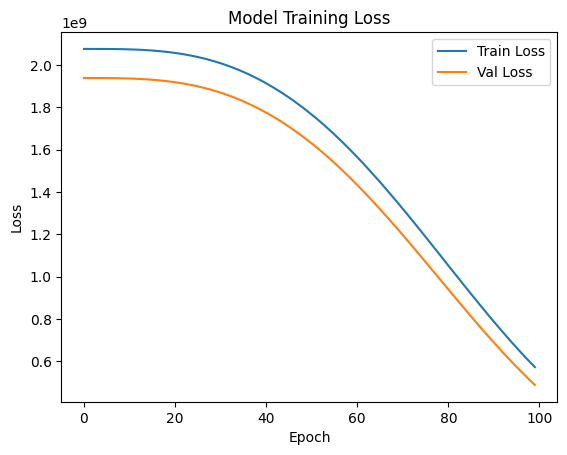

In [44]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training Loss')
plt.legend()
plt.show()


| Observation                  | What It Means                         |
| ---------------------------- | ------------------------------------- |
| Losses going down            | Model is learning                     |
| Validation < Training loss   | No overfitting (good!)                |
| Smooth curves                | Stable training                       |
| Loss still decreasing at end | Can try more epochs or early stopping |
